   Lattice Size  Original Runtime  NumPy Runtime  Numba Runtime  \
0            20           0.14431        0.01457        0.02953   
1            50           2.15871        0.04604        0.04252   
2            80          17.22679        0.29951        0.11398   
3           100          21.54517        0.37844        0.13603   
4           130          85.84456        1.37014        0.37082   
5           160         186.66789        2.62829        0.87825   
6           200         187.48051        3.86389        0.86874   

   Cython Runtime  Parallel Cython Runtime  MPI Runtime  
0         0.00287                  0.00336      0.00301  
1         0.03377                  0.02562      0.01976  
2         0.20084                  0.11294      0.07965  
3         0.26952                  0.20782      0.13703  
4         0.90377                  0.48603      0.49100  
5         1.63748                  1.01154      1.00359  
6         2.05340                  1.52536      1.26479  

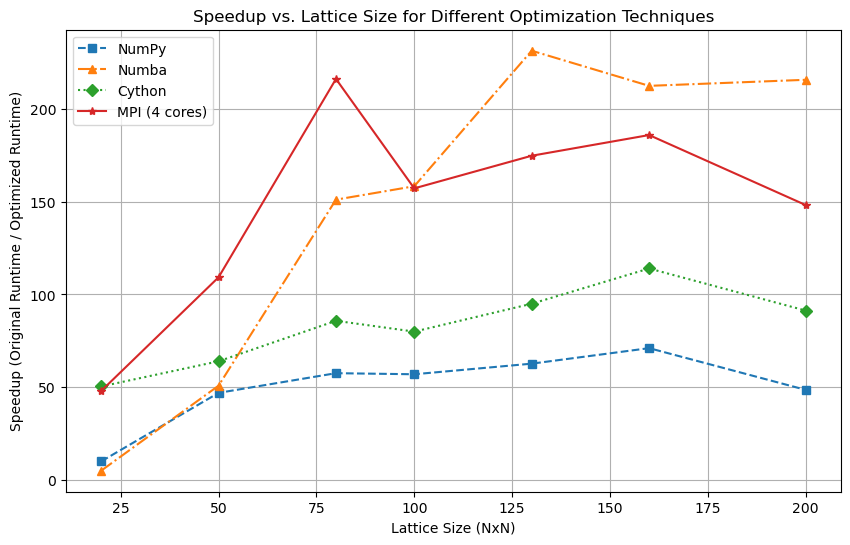

,Lattice Size,Original Runtime,NumPy Runtime,Numba Runtime,Cython Runtime,Parallel Cython Runtime,MPI Runtime
0,20,0.14431,0.01457,0.02953,0.00287,0.00336,0.00301
1,50,2.15871,0.04604,0.04252,0.03377,0.02562,0.01976
2,80,17.22679,0.29951,0.11398,0.20084,0.11294,0.07965
3,100,21.54517,0.37844,0.13603,0.26952,0.20782,0.13703
4,130,85.84456,1.37014,0.37082,0.90377,0.48603,0.49100
5,160,186.66789,2.62829,0.87825,1.63748,1.01154,1.00359
6,200,187.48051,3.86389,0.86874,2.05340,1.52536,1.26479


In [ ]:
# Calculate speedup
lattice_sizes = [20, 50, 80, 100, 130, 160, 200]
original_runtimes = [0.144308, 2.158708, 17.226791, 21.545166,  85.844556, 186.667892, 187.480510]
numpy_runtimes = [0.014569, 0.046035, 0.299510, 0.378439, 1.370135, 2.628286, 3.863889]
numba_runtimes = [0.029526, 0.042521, 0.113978, 0.136032, 0.370821, 0.878252, 0.868736]
cython_runtimes = [0.002866, 0.033766, 0.200835, 0.269518, 0.903771, 1.637478, 2.053397]
parallel_cython_runtimes = [0.003361, 0.025620, 0.112943, 0.207816, 0.486031, 1.011544, 1.525361]
mpi_runtimes = [0.003013, 0.019758, 0.079653, 0.137029, 0.491005, 1.003587, 1.264787]

numpy_speedup = [original / numpy for original, numpy in zip(original_runtimes, numpy_runtimes)]
numba_speedup = [original / numba for original, numba in zip(original_runtimes, numba_runtimes)]
cython_speedup = [original / cython for original, cython in zip(original_runtimes, cython_runtimes)]
parallel_cython_speedup = [original / parallel_cython for original, parallel_cython in zip(original_runtimes, parallel_cython_runtimes)]
mpi_speedup = [original / mpi for original, mpi in zip(original_runtimes, mpi_runtimes)]

# Create DataFrame
summary_data = pd.DataFrame({
    'Lattice Size': lattice_sizes,
   'Original Runtime': original_runtimes,
    'NumPy Runtime': numpy_runtimes,
    'Numba Runtime': numba_runtimes,
    'Cython Runtime': cython_runtimes,
    'Parallel Cython Runtime': parallel_cython_runtimes,
    'MPI Runtime': mpi_runtimes
})

# Round values for better readability
summary_data = summary_data.round(5)

# Print table
print(summary_data) 
# Plot
plt.figure(figsize=(10, 6))
plt.plot(lattice_sizes, numpy_speedup, label="NumPy", marker='s', linestyle='--')
plt.plot(lattice_sizes, numba_speedup, label="Numba", marker='^', linestyle='-.')
plt.plot(lattice_sizes, cython_speedup, label="Cython", marker='D', linestyle=':')
plt.plot(lattice_sizes, mpi_speedup, label="MPI (4 cores)", marker='*', linestyle='-')

# Labels and title
plt.xlabel("Lattice Size (NxN)")
plt.ylabel("Speedup (Original Runtime / Optimized Runtime)")
plt.title("Speedup vs. Lattice Size for Different Optimization Techniques")
plt.legend()
plt.grid(True)
plt.show()

summary_data

In [ ]:
lattice_sizes = [20, 50, 80, 100, 130, 160, 200]
original_runtimes = [0.144308, 2.158708, 17.226791, 21.545166,  85.844556, 186.667892, 187.480510]
original_runtime_data = pd.DataFrame({
    'Lattice Size': lattice_sizes,
    'Original Runtime': original_runtimes
})

original_runtime_data

,Lattice Size,Original Runtime
0,20,0.144308
1,50,2.158708
2,80,17.226791
3,100,21.545166
4,130,85.844556
5,160,186.667892
6,200,187.480510


   Lattice Size  Original Runtime  NumPy Runtime  NumPy Speedup
0            20          0.144308       0.014569       9.905141
1            50          2.158708       0.046035      46.892756
2            80         17.226791       0.299510      57.516580
3           100         21.545166       0.378439      56.931675
4           130         85.844556       1.370135      62.654086
5           160        186.667892       2.628286      71.022671
6           200        187.480510       3.863889      48.521195


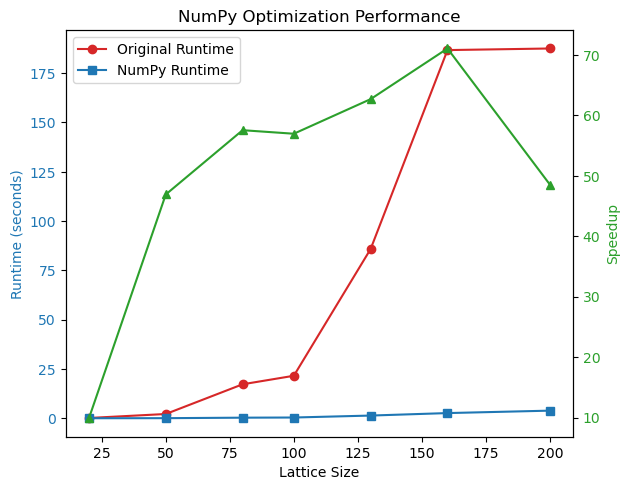

In [110]:
import matplotlib.pyplot as plt
import pandas as pd

# Define data
lattice_sizes = [20, 50, 80, 100, 130, 160, 200]
original_runtimes = [0.144308, 2.158708, 17.226791, 21.545166, 85.844556, 186.667892, 187.480510]
numpy_runtimes = [0.014569, 0.046035, 0.299510, 0.378439, 1.370135, 2.628286, 3.863889]

# Function to calculate speedup
def calculate_speedup(original_runtime, optimized_runtime):
    return original_runtime / optimized_runtime

# Create DataFrame
numpy_data = pd.DataFrame({
    'Lattice Size': lattice_sizes,
    'Original Runtime': original_runtimes,
    'NumPy Runtime': numpy_runtimes,
    'NumPy Speedup': [calculate_speedup(original, optimized) for original, optimized in zip(original_runtimes, numpy_runtimes)]
})

# Print DataFrame
print(numpy_data)

# Plot runtime comparison
fig, ax1 = plt.subplots()

ax1.set_xlabel('Lattice Size')
ax1.set_ylabel('Runtime (seconds)', color='tab:blue')
ax1.plot(numpy_data['Lattice Size'], numpy_data['Original Runtime'], label='Original Runtime', color='tab:red', marker='o')
ax1.plot(numpy_data['Lattice Size'], numpy_data['NumPy Runtime'], label='NumPy Runtime', color='tab:blue', marker='s')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Create second y-axis for speedup
ax2 = ax1.twinx()
ax2.set_ylabel('Speedup', color='tab:green')
ax2.plot(numpy_data['Lattice Size'], numpy_data['NumPy Speedup'], label='NumPy Speedup', color='tab:green', marker='^')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('NumPy Optimization Performance')
plt.show()



   Lattice Size  Original Runtime  Numba Runtime  Numba Speedup
0            20          0.144308       0.029526       4.887489
1            50          2.158708       0.042521      50.768044
2            80         17.226791       0.113978     151.141369
3           100         21.545166       0.136032     158.383072
4           130         85.844556       0.370821     231.498637
5           160        186.667892       0.878252     212.544796
6           200        187.480510       0.868736     215.808381


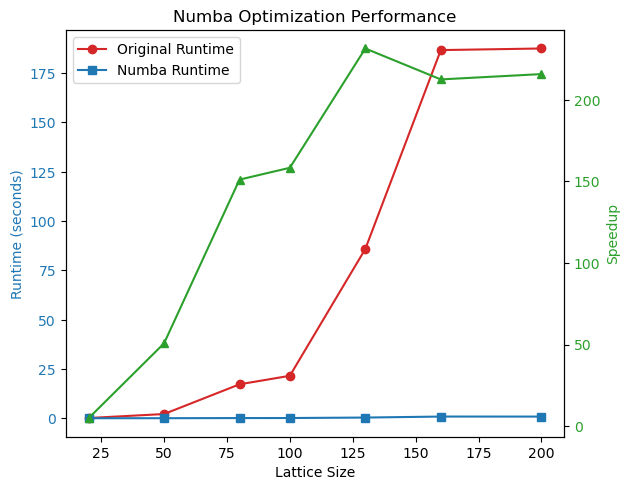

In [111]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Numba
lattice_sizes = [20, 50, 80, 100, 130, 160, 200]
original_runtimes = [0.144308, 2.158708, 17.226791, 21.545166, 85.844556, 186.667892, 187.480510]
numba_runtimes = [0.029526, 0.042521, 0.113978, 0.136032, 0.370821, 0.878252, 0.868736]
numba_speedup = [original / optimized for original, optimized in zip(original_runtimes, numba_runtimes)]

# Create DataFrame
numba_data = pd.DataFrame({
    'Lattice Size': lattice_sizes,
    'Original Runtime': original_runtimes,
    'Numba Runtime': numba_runtimes,
    'Numba Speedup': numba_speedup
})

print(numba_data)

# Plot runtime comparison and speedup
fig, ax1 = plt.subplots()

ax1.set_xlabel('Lattice Size')
ax1.set_ylabel('Runtime (seconds)', color='tab:blue')
ax1.plot(lattice_sizes, original_runtimes, label='Original Runtime', color='tab:red', marker='o')
ax1.plot(lattice_sizes, numba_runtimes, label='Numba Runtime', color='tab:blue', marker='s')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Speedup', color='tab:green')
ax2.plot(lattice_sizes, numba_speedup, label='Numba Speedup', color='tab:green', marker='^')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Numba Optimization Performance')
plt.show()



   Lattice Size  Original Runtime  Cython Runtime  Cython Speedup
0            20          0.144308        0.002866       50.351710
1            50          2.158708        0.033766       63.931410
2            80         17.226791        0.200835       85.775841
3           100         21.545166        0.269518       79.939618
4           130         85.844556        0.903771       94.984853
5           160        186.667892        1.637478      113.997191
6           200        187.480510        2.053397       91.302612


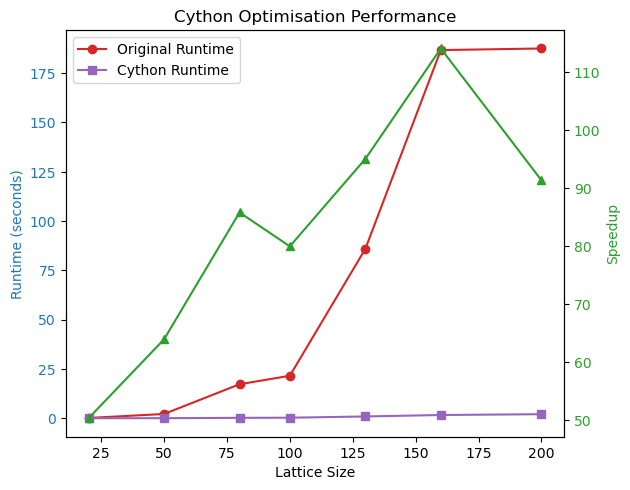

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Cython
cython_runtimes = [0.002866, 0.033766, 0.200835, 0.269518, 0.903771, 1.637478, 2.053397]
cython_speedup = [original / optimized for original, optimized in zip(original_runtimes, cython_runtimes)]

# Create DataFrame
cython_data = pd.DataFrame({
    'Lattice Size': lattice_sizes,
    'Original Runtime': original_runtimes,
    'Cython Runtime': cython_runtimes,
    'Cython Speedup': cython_speedup
})

print(cython_data)

# Plot runtime comparison and speedup
fig, ax1 = plt.subplots()

ax1.set_xlabel('Lattice Size')
ax1.set_ylabel('Runtime (seconds)', color='tab:blue')
ax1.plot(lattice_sizes, original_runtimes, label='Original Runtime', color='tab:red', marker='o')
ax1.plot(lattice_sizes, cython_runtimes, label='Cython Runtime', color='tab:purple', marker='s')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Speedup', color='tab:green')
ax2.plot(lattice_sizes, cython_speedup, label='Cython Speedup', color='tab:green', marker='^')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Cython Optimisation Performance')
plt.show()



   Lattice Size  Original Runtime  Parallel Cython Runtime  \
0            20          0.144308                 0.003361   
1            50          2.158708                 0.025620   
2            80         17.226791                 0.112943   
3           100         21.545166                 0.207816   
4           130         85.844556                 0.486031   
5           160        186.667892                 1.011544   
6           200        187.480510                 1.525361   

   Parallel Cython Speedup  
0                42.936031  
1                84.258704  
2               152.526416  
3               103.674241  
4               176.623623  
5               184.537590  
6               122.908944  


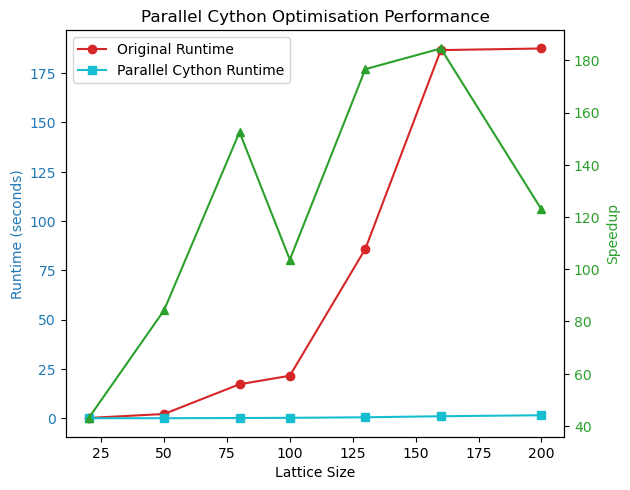

In [113]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Parallel Cython
parallel_cython_runtimes = [0.003361, 0.025620, 0.112943, 0.207816, 0.486031, 1.011544, 1.525361]
parallel_cython_speedup = [original / optimized for original, optimized in zip(original_runtimes, parallel_cython_runtimes)]

# Create DataFrame
parallel_cython_data = pd.DataFrame({
    'Lattice Size': lattice_sizes,
    'Original Runtime': original_runtimes,
    'Parallel Cython Runtime': parallel_cython_runtimes,
    'Parallel Cython Speedup': parallel_cython_speedup
})

print(parallel_cython_data)

# Plot runtime comparison and speedup
fig, ax1 = plt.subplots()

ax1.set_xlabel('Lattice Size')
ax1.set_ylabel('Runtime (seconds)', color='tab:blue')
ax1.plot(lattice_sizes, original_runtimes, label='Original Runtime', color='tab:red', marker='o')
ax1.plot(lattice_sizes, parallel_cython_runtimes, label='Parallel Cython Runtime', color='tab:cyan', marker='s')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Speedup', color='tab:green')
ax2.plot(lattice_sizes, parallel_cython_speedup, label='Parallel Cython Speedup', color='tab:green', marker='^')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Parallel Cython Optimisation Performance')
plt.show()


   Lattice Size  Original Runtime  MPI Runtime  MPI Speedup
0            20          0.144308     0.003013    47.895121
1            50          2.158708     0.019758   109.257415
2            80         17.226791     0.079653   216.272972
3           100         21.545166     0.137029   157.230703
4           130         85.844556     0.491005   174.834383
5           160        186.667892     1.003587   186.000707
6           200        187.480510     1.264787   148.230896


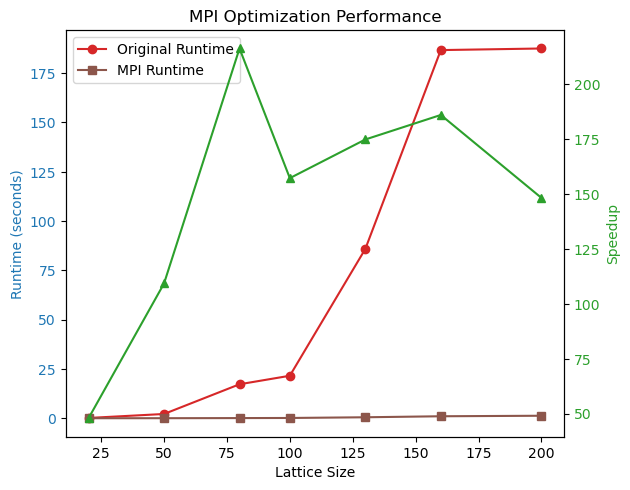

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for MPI
mpi_runtimes = [0.003013, 0.019758, 0.079653, 0.137029, 0.491005, 1.003587, 1.264787]
mpi_speedup = [original / optimized for original, optimized in zip(original_runtimes, mpi_runtimes)]

# Create DataFrame
mpi_data = pd.DataFrame({
    'Lattice Size': lattice_sizes,
    'Original Runtime': original_runtimes,
    'MPI Runtime': mpi_runtimes,
    'MPI Speedup': mpi_speedup
})

print(mpi_data)

# Plot runtime comparison and speedup
fig, ax1 = plt.subplots()

ax1.set_xlabel('Lattice Size')
ax1.set_ylabel('Runtime (seconds)', color='tab:blue')
ax1.plot(lattice_sizes, original_runtimes, label='Original Runtime', color='tab:red', marker='o')
ax1.plot(lattice_sizes, mpi_runtimes, label='MPI Runtime', color='tab:brown', marker='s')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Speedup', color='tab:green')
ax2.plot(lattice_sizes, mpi_speedup, label='MPI Speedup', color='tab:green', marker='^')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('MPI Optimization Performance')
plt.show()


In [7]:
import pandas as pd
data = {
    'Processes': [1, 2, 3, 4],
    'MPI Only Runtime': [0.024946, 0.027054, 0.03456, 0.075005],
    'MPI + Cython Runtime': [0.022980, 0.17979, 0.021184, 0.024621]
}

df = pd.DataFrame(data)
df['Speedup'] = df['MPI Only Runtime'] / df['MPI + Cython Runtime']
df

,Processes,MPI Only Runtime,MPI + Cython Runtime,Speedup
0,1,0.024946,0.022980,1.085553
1,2,0.027054,0.179790,0.150476
2,3,0.034560,0.021184,1.631420
3,4,0.075005,0.024621,3.046383


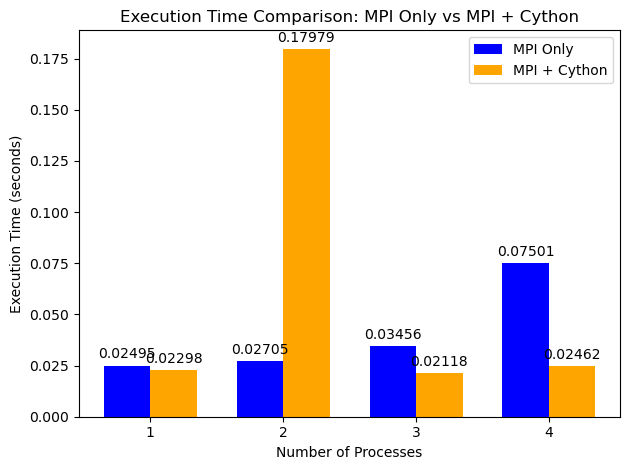

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data
processes = [1, 2, 3, 4]
mpi_only_times = [0.024946, 0.027054, 0.03456, 0.075005]
mpi_cython_times = [0.022980, 0.17979, 0.021184, 0.024621]

# Plotting
x = np.arange(len(processes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mpi_only_times, width, label='MPI Only', color='blue')
rects2 = ax.bar(x + width/2, mpi_cython_times, width, label='MPI + Cython', color='orange')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Execution Time (seconds)')
ax.set_title('Execution Time Comparison: MPI Only vs MPI + Cython')
ax.set_xticks(x)
ax.set_xticklabels(processes)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.5f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Display the plot
plt.tight_layout()
plt.show()

In [115]:
import pandas as pd

# Blue Crystal MPI runtimes (Lattice Size, Cores, Runtime)
blue_crystal_runtimes = [
    (20, 2, 0.008417),
    (50, 4, 0.047641),
    (50, 8, 0.047910),
    (80, 8, 0.150075),
    (80, 16, 0.141622),
    (80, 16, 0.255698),
    (80, 20, 0.151),
    (100, 20, 0.276723),
    (130, 20, 0.570727),
    (100, 24, 0.276723),
    (130, 24, 0.578210),
    (160, 24, 1.047005),
    (130, 28, 0.572947),
    (160, 28, 1.050587),
]

# Local MPI runtimes (Lattice Size, Cores, Runtime)
local_runtimes = [
    (20, 1, 0.006022),
    (50, 2, 0.017187),
    (50, 3, 0.037039),
    (80, 2, 0.071063),
    (80, 3, 0.066861),
    (100, 3, 0.136785),
    (100, 4, 0.125199),
    (130, 3, 0.237911),
    (130, 4, 0.212162),
    (160, 3, 0.531071),
    (160, 4, 0.913491),
    (200, 3, 1.157126),
    (200, 4, 1.072769),
]

# Function to calculate speedup
def calculate_speedup(original, optimized):
    return original / optimized if optimized else None

# Convert to DataFrames
blue_df = pd.DataFrame(blue_crystal_runtimes, columns=['Lattice Size', 'Cores', 'Blue Crystal Runtime'])
local_df = pd.DataFrame(local_runtimes, columns=['Lattice Size', 'Cores', 'Local Runtime'])

# Add Speedup Column 
baseline_runtime_blue = blue_df.groupby('Lattice Size')['Blue Crystal Runtime'].transform('min')
blue_df['Speedup'] = baseline_runtime_blue / blue_df['Blue Crystal Runtime']
blue_df['Efficiency (%)'] = (blue_df['Speedup'] / blue_df['Cores']) * 100

baseline_runtime_local = local_df.groupby('Lattice Size')['Local Runtime'].transform('min')
local_df['Speedup'] = baseline_runtime_local / local_df['Local Runtime']
local_df['Efficiency (%)'] = (local_df['Speedup'] / local_df['Cores']) * 100

# Round values for readability
blue_df = blue_df.round(3)
local_df = local_df.round(3)

# Display the tables
print("Blue Crystal Results:")
print(blue_df)
print("\nLocal Results:")
print(local_df)


Blue Crystal Results:
    Lattice Size  Cores  Blue Crystal Runtime  Speedup  Efficiency (%)
0             20      2                 0.008    1.000          50.000
1             50      4                 0.048    1.000          25.000
2             50      8                 0.048    0.994          12.430
3             80      8                 0.150    0.944          11.796
4             80     16                 0.142    1.000           6.250
5             80     16                 0.256    0.554           3.462
6             80     20                 0.151    0.938           4.689
7            100     20                 0.277    1.000           5.000
8            130     20                 0.571    1.000           5.000
9            100     24                 0.277    1.000           4.167
10           130     24                 0.578    0.987           4.113
11           160     24                 1.047    1.000           4.167
12           130     28                 0.573    0.996 